# __Regression of Used Car Prices__

In [1]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
!pip install opendatasets --upgrade

In [4]:
import opendatasets as od

#__Downloading the Data__

## __Dataset source:__ https://www.kaggle.com/competitions/playground-series-s4e9

### We'll use the opendatasets library to download the data from Kaggle directly within Jupyter.

In [5]:
od.download('https://www.kaggle.com/competitions/playground-series-s4e9')

Skipping, found downloaded files in "./playground-series-s4e9" (use force=True to force download)


## __The dataset is downloaded and extracted to the folder playground-series-s4e9__

In [6]:
os.listdir('playground-series-s4e9')

['sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
train = pd.read_csv('playground-series-s4e9/train.csv')

In [8]:
train

id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188531  188531           Audi          S5 3.0T Prestige        2022   13895   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type                                             engine  \
0            Gasoline       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1            Gasoline       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2       E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3            Gasoline       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4            Gasoline       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...               ...                                                ...   
188528       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529       Gasoline      385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530       Gasoline       469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188531       Gasoline                                               3.0L   
188532       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission                    ext_col int_col  \
0                                  A/T                     Yellow    Gray   
1                                  A/T                     Silver   Beige   
2                                  A/T                       Blue    Gray   
3       Transmission w/Dual Shift Mode                      Black   Black   
4                          7-Speed A/T                      Black   Beige   
...                                ...                        ...     ...   
188528  Transmission w/Dual Shift Mode                      White   Beige   
188529                     8-Speed A/T                      White   Black   
188530                     7-Speed A/T                      White   Black   
188531               1-Speed Automatic  Daytona Gray Pearl Effect   Black   
188532  Transmission w/Dual Shift Mode                      White   Black   

                                      accident clean_title  price  
0                                None reported         Yes   4200  
1       At least 1 accident or damage reported         Yes   4999  
2                                None reported         Yes  13900  
3                                None reported         Yes  45000  
4                                None reported         Yes  97500  
...                                        ...         ...    ...  
188528                           None reported         Yes  27500  
188529  At least 1 accident or damage reported         Yes  30000  
188530                           None reported         Yes  86900  
188531                           None reported         NaN  84900  
188532                           None reported         Yes  28995  

[188533 rows x 13 columns]

In [9]:
test = pd.read_csv('playground-series-s4e9/test.csv')

In [10]:
test

id          brand                   model  model_year  milage  \
0       188533           Land          Rover LR2 Base        2015   98000   
1       188534           Land       Rover Defender SE        2020    9142   
2       188535           Ford      Expedition Limited        2022   28121   
3       188536           Audi           A6 2.0T Sport        2016   61258   
4       188537           Audi    A6 2.0T Premium Plus        2018   59000   
...        ...            ...                     ...         ...     ...   
125685  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
125686  314219           Audi          Q7 55 Prestige        2019   29336   
125687  314220           Audi    A6 3.0T Premium Plus        2012   77634   
125688  314221           Audi         Q7 3.0T Premium        2012  112000   
125689  314222      Chevrolet                Tahoe LT        2018   66840   

       fuel_type                                             engine  \
0       Gasoline       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
1         Hybrid  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       Gasoline                    3.5L V6 24V PDI DOHC Twin Turbo   
3       Gasoline                                     2.0 Liter TFSI   
4       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...          ...                                                ...   
125685  Gasoline      362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125686  Gasoline                                    3.0 Liter Turbo   
125687  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125688  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125689  Gasoline       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   

              transmission          ext_col int_col       accident clean_title  
0              6-Speed A/T            White   Beige  None reported         Yes  
1              8-Speed A/T           Silver   Black  None reported         Yes  
2       10-Speed Automatic            White   Ebony  None reported         NaN  
3                Automatic  Silician Yellow   Black  None reported         NaN  
4                      A/T             Gray   Black  None reported         Yes  
...                    ...              ...     ...            ...         ...  
125685         7-Speed A/T            Black   Black  None reported         Yes  
125686           Automatic            White   Black  None reported         NaN  
125687                 A/T            Black   Black  None reported         Yes  
125688                 A/T            Black   Black  None reported         Yes  
125689                 A/T           Silver   Black  None reported         Yes  

[125690 rows x 12 columns]

In [11]:
submission = pd.read_csv('playground-series-s4e9/sample_submission.csv')

In [12]:
submission

id      price
0       188533  43878.016
1       188534  43878.016
2       188535  43878.016
3       188536  43878.016
4       188537  43878.016
...        ...        ...
125685  314218  43878.016
125686  314219  43878.016
125687  314220  43878.016
125688  314221  43878.016
125689  314222  43878.016

[125690 rows x 2 columns]

### __Understanding our data.__

#### __Let understand train dataset.__

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [14]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [15]:
train.shape

(188533, 13)

In [16]:
train.duplicated().sum()

np.int64(0)

#### __Let understand test dataset.__

test.info()

In [17]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [18]:
test.shape

(125690, 12)

## __Since we can see all the null values comes from Categorical columns let drop them.__

#### __Let remove null values on train dataset and we rename it, to train_data.__

In [19]:
train_data= train.dropna()

In [20]:
train_data

id          brand                     model  model_year  milage  \
0            0           MINI             Cooper S Base        2007  213000   
1            1        Lincoln                     LS V8        2002  143250   
2            2      Chevrolet         Silverado 2500 LT        2002  136731   
3            3        Genesis          G90 5.0 Ultimate        2017   19500   
4            4  Mercedes-Benz               Metris Base        2021    7388   
...        ...            ...                       ...         ...     ...   
188527  188527      Chevrolet                Camaro Z28        1999  110000   
188528  188528       Cadillac     Escalade ESV Platinum        2017   49000   
188529  188529  Mercedes-Benz  AMG C 43 AMG C 43 4MATIC        2018   28600   
188530  188530  Mercedes-Benz    AMG GLC 63 Base 4MATIC        2021   13650   
188532  188532        Porsche                Macan Base        2016   59500   

            fuel_type                                             engine  \
0            Gasoline       172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
1            Gasoline       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2       E85 Flex Fuel  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3            Gasoline       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4            Gasoline       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...               ...                                                ...   
188527       Gasoline       310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel   
188528       Gasoline       420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel   
188529       Gasoline      385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
188530       Gasoline       469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
188532       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
0                                  A/T  Yellow    Gray   
1                                  A/T  Silver   Beige   
2                                  A/T    Blue    Gray   
3       Transmission w/Dual Shift Mode   Black   Black   
4                          7-Speed A/T   Black   Beige   
...                                ...     ...     ...   
188527                             A/T   White    Gray   
188528  Transmission w/Dual Shift Mode   White   Beige   
188529                     8-Speed A/T   White   Black   
188530                     7-Speed A/T   White   Black   
188532  Transmission w/Dual Shift Mode   White   Black   

                                      accident clean_title  price  
0                                None reported         Yes   4200  
1       At least 1 accident or damage reported         Yes   4999  
2                                None reported         Yes  13900  
3                                None reported         Yes  45000  
4                                None reported         Yes  97500  
...                                        ...         ...    ...  
188527                           None reported         Yes  14500  
188528                           None reported         Yes  27500  
188529  At least 1 accident or damage reported         Yes  30000  
188530                           None reported         Yes  86900  
188532                           None reported         Yes  28995  

[162610 rows x 13 columns]

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162610 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            162610 non-null  int64 
 1   brand         162610 non-null  object
 2   model         162610 non-null  object
 3   model_year    162610 non-null  int64 
 4   milage        162610 non-null  int64 
 5   fuel_type     162610 non-null  object
 6   engine        162610 non-null  object
 7   transmission  162610 non-null  object
 8   ext_col       162610 non-null  object
 9   int_col       162610 non-null  object
 10  accident      162610 non-null  object
 11  clean_title   162610 non-null  object
 12  price         162610 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 17.4+ MB


In [22]:
train_data.shape

(162610, 13)

#### __Let remove null to test dataset and rename it to test_df.__

In [23]:
test_df = test.dropna()

In [24]:
test_df

id          brand                   model  model_year  milage  \
0       188533           Land          Rover LR2 Base        2015   98000   
1       188534           Land       Rover Defender SE        2020    9142   
4       188537           Audi    A6 2.0T Premium Plus        2018   59000   
5       188538      Chevrolet   Express 2500 Work Van        2013   99524   
6       188539          Lexus             RX 350 Base        2008  194000   
...        ...            ...                     ...         ...     ...   
125683  314216  Mercedes-Benz  GL-Class GL 450 4MATIC        2011  192000   
125685  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
125687  314220           Audi    A6 3.0T Premium Plus        2012   77634   
125688  314221           Audi         Q7 3.0T Premium        2012  112000   
125689  314222      Chevrolet                Tahoe LT        2018   66840   

       fuel_type                                             engine  \
0       Gasoline       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
1         Hybrid  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
5       Gasoline       285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel   
6       Gasoline      270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
...          ...                                                ...   
125683  Gasoline       335.0HP 4.7L 8 Cylinder Engine Gasoline Fuel   
125685  Gasoline      362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125687  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125688  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125689  Gasoline       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
0                          6-Speed A/T   White   Beige   
1                          8-Speed A/T  Silver   Black   
4                                  A/T    Gray   Black   
5                                  A/T   Black   Black   
6       Transmission w/Dual Shift Mode  Silver    Gray   
...                                ...     ...     ...   
125683                     7-Speed A/T   Black   Black   
125685                     7-Speed A/T   Black   Black   
125687                             A/T   Black   Black   
125688                             A/T   Black   Black   
125689                             A/T  Silver   Black   

                                      accident clean_title  
0                                None reported         Yes  
1                                None reported         Yes  
4                                None reported         Yes  
5                                None reported         Yes  
6                                None reported         Yes  
...                                        ...         ...  
125683  At least 1 accident or damage reported         Yes  
125685                           None reported         Yes  
125687                           None reported         Yes  
125688                           None reported         Yes  
125689                           None reported         Yes  

[108459 rows x 12 columns]

In [25]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108459 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            108459 non-null  int64 
 1   brand         108459 non-null  object
 2   model         108459 non-null  object
 3   model_year    108459 non-null  int64 
 4   milage        108459 non-null  int64 
 5   fuel_type     108459 non-null  object
 6   engine        108459 non-null  object
 7   transmission  108459 non-null  object
 8   ext_col       108459 non-null  object
 9   int_col       108459 non-null  object
 10  accident      108459 non-null  object
 11  clean_title   108459 non-null  object
dtypes: int64(3), object(9)
memory usage: 10.8+ MB


In [26]:
test_df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [27]:
test_df.shape

(108459, 12)

## __Let reduce the size of train_data we are working on for better perfoemance during training, this also will favor our processor speed.__

In [28]:
use_sample = True

In [29]:
sample_fraction = 0.3

In [30]:
if use_sample:
    train_data = train_data.sample(frac=sample_fraction).copy()

In [31]:
train_data

id      brand                   model  model_year  milage  \
134963  134963    Lincoln             MKZ Reserve        2017    7800   
103353  103353       Ford            F-150 Lariat        2016   70700   
23946    23946     Nissan         370Z NISMO Tech        2019   42500   
102071  102071  Chevrolet        Suburban Premier        2019   86111   
55273    55273        BMW                 M4 Base        2005   62350   
...        ...        ...                     ...         ...     ...   
7961      7961       Ford  Expedition Max Limited        2023    2415   
63868    63868   Cadillac   SRX Luxury Collection        2011  152000   
91067    91067      Acura    TLX w/A-Spec Package        2020    8974   
103153  103153       Ford      Expedition Limited        2021   20386   
182160  182160   Cadillac                CTS Base        2012  106000   

       fuel_type                                         engine  \
134963  Gasoline   240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
103353  Gasoline  325.0HP 2.7L V6 Cylinder Engine Gasoline Fuel   
23946   Gasoline  350.0HP 3.7L V6 Cylinder Engine Gasoline Fuel   
102071  Gasoline                            5.3L V8 16V GDI OHV   
55273   Gasoline   414.0HP 4.0L 8 Cylinder Engine Gasoline Fuel   
...          ...                                            ...   
7961    Gasoline  400.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
63868   Gasoline  308.0HP 3.6L V6 Cylinder Engine Gasoline Fuel   
91067   Gasoline   206.0HP 2.4L 4 Cylinder Engine Gasoline Fuel   
103153  Gasoline                3.5L V6 24V PDI DOHC Twin Turbo   
182160  Gasoline  270.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   

              transmission ext_col    int_col  \
134963         6-Speed A/T  Silver      Beige   
103353                 A/T   White      Black   
23946                  M/T  Silver        Red   
102071   8-Speed Automatic   Black  Jet Black   
55273          6-Speed M/T  Silver      Beige   
...                    ...     ...        ...   
7961          10-Speed A/T    Blue       Gray   
63868          6-Speed A/T   Black      Beige   
91067                  A/T   White        Red   
103153  10-Speed Automatic   Black    Ceramic   
182160         6-Speed A/T   Black      Black   

                                      accident clean_title  price  
134963                           None reported         Yes  36499  
103353                           None reported         Yes  26600  
23946                            None reported         Yes  26000  
102071                           None reported         Yes  25215  
55273   At least 1 accident or damage reported         Yes  24900  
...                                        ...         ...    ...  
7961                             None reported         Yes  64900  
63868                            None reported         Yes   6499  
91067                            None reported         Yes  21800  
103153                           None reported         Yes  55655  
182160                           None reported         Yes  15500  

[48783 rows x 13 columns]

### __Since we have train_data and test_data let divide our train_data in two, train_df and val_df in the ratio of 80% and 20% respectively for training and validation data.__

### __Training and Validation data.__

### First we import  train_test_split from sklearn

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, val_df = train_test_split(train_data, test_size=0.20, random_state=42)

#### Let view our split datasets shapes.

In [34]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)

train_df.shape : (39026, 13)
val_df.shape : (9757, 13)


Now our tain_data  has been divided into two datasets train_df which has a shape of (130088, 13) and validation dataset which has a shape of (32522, 13)

### __Let Clarify inputs columns and target column on our data__

In [35]:
train_df

id   brand               model  model_year  milage fuel_type  \
188136  188136     BMW             M4 Base        2020   41000  Gasoline   
146722  146722    Ford  Mustang GT Premium        2022    4437  Gasoline   
139087  139087  Jaguar            F-TYPE R        2015   51400  Gasoline   
183489  183489    Jeep      Wrangler Sport        2001  149460  Gasoline   
32646    32646  Jaguar      XF 25t Premium        2018   41500  Gasoline   
...        ...     ...                 ...         ...     ...       ...   
153520  153520    MINI       Cooper S Base        2007  118000  Gasoline   
156223  156223    Ford   Expedition EL XLT        2017   85253  Gasoline   
17693    17693     BMW        440 i xDrive        2017   57918  Gasoline   
34473    34473    Ford           F-150 XLT        2018   68364  Gasoline   
154881  154881  Hummer             H2 Base        2005   64800  Gasoline   

                                                   engine  \
188136  425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
146722       460.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
139087       550.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
183489  190.0HP 4.0L Straight 6 Cylinder Engine Gasoli...   
32646        247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...                                                   ...   
153520       181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
156223      365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
17693   320.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
34473       375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
154881       316.0HP 6.0L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
188136  Transmission w/Dual Shift Mode    Gold   Brown   
146722                    10-Speed A/T    Blue   Black   
139087                     6-Speed A/T    Gray     Red   
183489                     5-Speed M/T   Green    Gray   
32646                      8-Speed A/T    Gray   Black   
...                                ...     ...     ...   
153520                     6-Speed A/T    Blue   Black   
156223                     6-Speed A/T   Black   Beige   
17693                      8-Speed A/T   Black   Black   
34473                     10-Speed A/T    Gray    Gray   
154881                             A/T   White    Gray   

                                      accident clean_title  price  
188136                           None reported         Yes  53900  
146722                           None reported         Yes  47000  
139087                           None reported         Yes  26999  
183489                           None reported         Yes   9999  
32646                            None reported         Yes  45500  
...                                        ...         ...    ...  
153520                           None reported         Yes   5700  
156223                           None reported         Yes  29999  
17693                            None reported         Yes  19900  
34473                            None reported         Yes  52000  
154881  At least 1 accident or damage reported         Yes   4400  

[39026 rows x 13 columns]

In [36]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'price'

In [37]:
input_cols

['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

In [38]:
test_df

id          brand                   model  model_year  milage  \
0       188533           Land          Rover LR2 Base        2015   98000   
1       188534           Land       Rover Defender SE        2020    9142   
4       188537           Audi    A6 2.0T Premium Plus        2018   59000   
5       188538      Chevrolet   Express 2500 Work Van        2013   99524   
6       188539          Lexus             RX 350 Base        2008  194000   
...        ...            ...                     ...         ...     ...   
125683  314216  Mercedes-Benz  GL-Class GL 450 4MATIC        2011  192000   
125685  314218  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315   
125687  314220           Audi    A6 3.0T Premium Plus        2012   77634   
125688  314221           Audi         Q7 3.0T Premium        2012  112000   
125689  314222      Chevrolet                Tahoe LT        2018   66840   

       fuel_type                                             engine  \
0       Gasoline       240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
1         Hybrid  395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4       Gasoline       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
5       Gasoline       285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel   
6       Gasoline      270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
...          ...                                                ...   
125683  Gasoline       335.0HP 4.7L 8 Cylinder Engine Gasoline Fuel   
125685  Gasoline      362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125687  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125688  Gasoline      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125689  Gasoline       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
0                          6-Speed A/T   White   Beige   
1                          8-Speed A/T  Silver   Black   
4                                  A/T    Gray   Black   
5                                  A/T   Black   Black   
6       Transmission w/Dual Shift Mode  Silver    Gray   
...                                ...     ...     ...   
125683                     7-Speed A/T   Black   Black   
125685                     7-Speed A/T   Black   Black   
125687                             A/T   Black   Black   
125688                             A/T   Black   Black   
125689                             A/T  Silver   Black   

                                      accident clean_title  
0                                None reported         Yes  
1                                None reported         Yes  
4                                None reported         Yes  
5                                None reported         Yes  
6                                None reported         Yes  
...                                        ...         ...  
125683  At least 1 accident or damage reported         Yes  
125685                           None reported         Yes  
125687                           None reported         Yes  
125688                           None reported         Yes  
125689                           None reported         Yes  

[108459 rows x 12 columns]

In [39]:
test_input_cols  = list(test_df.columns)[1:]

In [40]:
test_input_cols

['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title']

### __After that, we define the inputs and targets columns from our train_df, val_df and test_df.__

In [41]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [42]:
train_inputs

brand               model  model_year  milage fuel_type  \
188136     BMW             M4 Base        2020   41000  Gasoline   
146722    Ford  Mustang GT Premium        2022    4437  Gasoline   
139087  Jaguar            F-TYPE R        2015   51400  Gasoline   
183489    Jeep      Wrangler Sport        2001  149460  Gasoline   
32646   Jaguar      XF 25t Premium        2018   41500  Gasoline   
...        ...                 ...         ...     ...       ...   
153520    MINI       Cooper S Base        2007  118000  Gasoline   
156223    Ford   Expedition EL XLT        2017   85253  Gasoline   
17693      BMW        440 i xDrive        2017   57918  Gasoline   
34473     Ford           F-150 XLT        2018   68364  Gasoline   
154881  Hummer             H2 Base        2005   64800  Gasoline   

                                                   engine  \
188136  425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
146722       460.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
139087       550.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
183489  190.0HP 4.0L Straight 6 Cylinder Engine Gasoli...   
32646        247.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
...                                                   ...   
153520       181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel   
156223      365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
17693   320.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
34473       375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
154881       316.0HP 6.0L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
188136  Transmission w/Dual Shift Mode    Gold   Brown   
146722                    10-Speed A/T    Blue   Black   
139087                     6-Speed A/T    Gray     Red   
183489                     5-Speed M/T   Green    Gray   
32646                      8-Speed A/T    Gray   Black   
...                                ...     ...     ...   
153520                     6-Speed A/T    Blue   Black   
156223                     6-Speed A/T   Black   Beige   
17693                      8-Speed A/T   Black   Black   
34473                     10-Speed A/T    Gray    Gray   
154881                             A/T   White    Gray   

                                      accident clean_title  
188136                           None reported         Yes  
146722                           None reported         Yes  
139087                           None reported         Yes  
183489                           None reported         Yes  
32646                            None reported         Yes  
...                                        ...         ...  
153520                           None reported         Yes  
156223                           None reported         Yes  
17693                            None reported         Yes  
34473                            None reported         Yes  
154881  At least 1 accident or damage reported         Yes  

[39026 rows x 11 columns]

In [43]:
train_targets

188136    53900
146722    47000
139087    26999
183489     9999
32646     45500
          ...  
153520     5700
156223    29999
17693     19900
34473     52000
154881     4400
Name: price, Length: 39026, dtype: int64

In [44]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [45]:
val_inputs

brand                                 model  model_year  milage  \
114057   Porsche                             911 Turbo        2022   13800   
177667     Honda                               CR-V EX        2014   65000   
2721        Ford                                Bronco        2021   26177   
111922     Lucid                              Xterra S        2012   13935   
184108     Lexus                       CT 200h Premium        2014  115000   
...          ...                                   ...         ...     ...   
55851       Land  Rover Range Rover P530 SE LWB 7 Seat        2023    8700   
69958       Ford           Bronco Outer Banks Advanced        2022   19250   
47941        BMW               228 Gran Coupe i xDrive        2016   33499   
11822   INFINITI                                 G37 x        2007  120000   
152326       BMW             M8 Gran Coupe Competition        2022    5018   

       fuel_type                                             engine  \
114057  Gasoline  572.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel   
177667  Gasoline       160.0HP 1.5L 4 Cylinder Engine Gasoline Fuel   
2721    Gasoline                    2.7L V6 24V PDI DOHC Twin Turbo   
111922  Gasoline      261.0HP 4.0L V6 Cylinder Engine Gasoline Fuel   
184108    Hybrid  134.0HP 1.8L 4 Cylinder Engine Gas/Electric Hy...   
...          ...                                                ...   
55851   Gasoline       523.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   
69958   Gasoline       275.0HP 2.3L 4 Cylinder Engine Gasoline Fuel   
47941   Gasoline       228.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
11822   Gasoline      328.0HP 3.7L V6 Cylinder Engine Gasoline Fuel   
152326  Gasoline       617.0HP 4.4L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col     int_col  \
114057                     8-Speed A/T   Black           –   
177667                             A/T   Black        Gray   
2721                10-Speed Automatic    Blue  Black Onyx   
111922                     6-Speed A/T   Black       White   
184108                             A/T    Gray       Black   
...                                ...     ...         ...   
55851                      8-Speed A/T    Gray       Black   
69958                              A/T    Gray        Blue   
47941                      8-Speed A/T   Black       Black   
11822                              A/T  Silver       Black   
152326  Transmission w/Dual Shift Mode    Gray       Black   

                                      accident clean_title  
114057                           None reported         Yes  
177667                           None reported         Yes  
2721                             None reported         Yes  
111922                           None reported         Yes  
184108  At least 1 accident or damage reported         Yes  
...                                        ...         ...  
55851                            None reported         Yes  
69958                            None reported         Yes  
47941   At least 1 accident or damage reported         Yes  
11822   At least 1 accident or damage reported         Yes  
152326                           None reported         Yes  

[9757 rows x 11 columns]

In [46]:
val_targets

114057    94995
177667    17500
2721      71999
111922     9950
184108    12500
          ...  
55851     88900
69958     54000
47941     32850
11822      9250
152326    41950
Name: price, Length: 9757, dtype: int64

In [47]:
test_inputs = test_df[test_input_cols].copy()

In [48]:
test_inputs

brand                   model  model_year  milage fuel_type  \
0                Land          Rover LR2 Base        2015   98000  Gasoline   
1                Land       Rover Defender SE        2020    9142    Hybrid   
4                Audi    A6 2.0T Premium Plus        2018   59000  Gasoline   
5           Chevrolet   Express 2500 Work Van        2013   99524  Gasoline   
6               Lexus             RX 350 Base        2008  194000  Gasoline   
...               ...                     ...         ...     ...       ...   
125683  Mercedes-Benz  GL-Class GL 450 4MATIC        2011  192000  Gasoline   
125685  Mercedes-Benz  GL-Class GL 450 4MATIC        2014   83315  Gasoline   
125687           Audi    A6 3.0T Premium Plus        2012   77634  Gasoline   
125688           Audi         Q7 3.0T Premium        2012  112000  Gasoline   
125689      Chevrolet                Tahoe LT        2018   66840  Gasoline   

                                                   engine  \
0            240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
1       395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4            252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
5            285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel   
6           270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
...                                                   ...   
125683       335.0HP 4.7L 8 Cylinder Engine Gasoline Fuel   
125685      362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125687      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125688      333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
125689       355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel   

                          transmission ext_col int_col  \
0                          6-Speed A/T   White   Beige   
1                          8-Speed A/T  Silver   Black   
4                                  A/T    Gray   Black   
5                                  A/T   Black   Black   
6       Transmission w/Dual Shift Mode  Silver    Gray   
...                                ...     ...     ...   
125683                     7-Speed A/T   Black   Black   
125685                     7-Speed A/T   Black   Black   
125687                             A/T   Black   Black   
125688                             A/T   Black   Black   
125689                             A/T  Silver   Black   

                                      accident clean_title  
0                                None reported         Yes  
1                                None reported         Yes  
4                                None reported         Yes  
5                                None reported         Yes  
6                                None reported         Yes  
...                                        ...         ...  
125683  At least 1 accident or damage reported         Yes  
125685                           None reported         Yes  
125687                           None reported         Yes  
125688                           None reported         Yes  
125689                           None reported         Yes  

[108459 rows x 11 columns]

### __We Identify Numerical and Categorical Columns from the train_inputs, val_inputs and test_inputs.__

In [49]:
!pip install numpy --quiet

In [50]:
import numpy as np

In [51]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [52]:
numeric_cols

['model_year', 'milage']

In [53]:
train_inputs[numeric_cols].describe()

model_year         milage
count  39026.000000   39026.000000
mean    2015.179393   71215.978681
std        5.678278   50316.068391
min     1974.000000     100.000000
25%     2012.000000   29000.000000
50%     2016.000000   64500.000000
75%     2019.000000  101387.000000
max     2024.000000  405000.000000

### __We Scaling Numeric Features.__

##### Scaling numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$.
##### Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss.

### __We import `MinMaxScaler` from `sklearn.preprocessing` to scale values to the $(0,1)$ range.__

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler()

In [56]:
scaler.fit(train_data[numeric_cols])

MinMaxScaler()

In [57]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(1974.0), np.float64(100.0)]

In [58]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(2024.0), np.float64(405000.0)]

In [59]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [60]:
train_inputs[numeric_cols].describe()

model_year        milage
count  39026.000000  39026.000000
mean       0.823588      0.175638
std        0.113566      0.124268
min        0.000000      0.000000
25%        0.760000      0.071376
50%        0.840000      0.159052
75%        0.900000      0.250153
max        1.000000      1.000000

## __After Scaling Numerical Columns, we  Encoding Categorical Data.__

In [61]:
train_inputs[categorical_cols].nunique()

brand             54
model           1802
fuel_type          7
engine          1046
transmission      46
ext_col          257
int_col          129
accident           2
clean_title        1
dtype: int64

### We import OneHotEncoder class from sklearn.preprocessing.

In [62]:
from sklearn.preprocessing import OneHotEncoder

In [63]:
?OneHotEncoder

In [64]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [65]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [66]:
encoder.categories_

[array(['Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
        'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge', 'FIAT',
        'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer', 'Hyundai',
        'INFINITI', 'Jaguar', 'Jeep', 'Karma', 'Kia', 'Lamborghini',
        'Land', 'Lexus', 'Lincoln', 'Lotus', 'Lucid', 'MINI', 'Maserati',
        'Maybach', 'Mazda', 'McLaren', 'Mercedes-Benz', 'Mercury',
        'Mitsubishi', 'Nissan', 'Pontiac', 'Porsche', 'RAM', 'Rivian',
        'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki',
        'Tesla', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object),
 array(['124 Spider Abarth', '128 i', '135 i', ..., 'tC Base',
        'tC Release Series 6.0', 'xB Base'], dtype=object),
 array(['Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
        'not supported', '–'], dtype=object),
 array(['1.2L I3 12V GDI DOHC Turbo', '1.3L I3 12V GDI DOHC Turbo',
        '1.3L I3 12V MPFI DOHC Turbo', ..., 'V6', 'V8'

In [67]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['brand_Acura', 'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Bugatti', 'brand_Buick', 'brand_Cadillac', 'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_FIAT', 'brand_Ferrari', 'brand_Ford', 'brand_GMC', 'brand_Genesis', 'brand_Honda', 'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI', 'brand_Jaguar', 'brand_Jeep', 'brand_Karma', 'brand_Kia', 'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln', 'brand_Lotus', 'brand_Lucid', 'brand_MINI', 'brand_Maserati', 'brand_Maybach', 'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz', 'brand_Mercury', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Pontiac', 'brand_Porsche', 'brand_RAM', 'brand_Rivian', 'brand_Rolls-Royce', 'brand_Saab', 'brand_Saturn', 'brand_Scion', 'brand_Subaru', 'brand_Suzuki', 'brand_Tesla', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'model_124 Spider Abarth', 'model_128 i', 'model_135 i', 'model_135 is', 'model_1500 Big Horn', 'model_1500 Cheyenne', 'model_150

In [68]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-68-1875270495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipython-input-68-1875270495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipython-input-68-1875270495.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

In [69]:
train_inputs[encoded_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 39026 entries, 188136 to 154881
Columns: 3344 entries, brand_Acura to clean_title_Yes
dtypes: float64(3344)
memory usage: 996.0 MB


In [70]:
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-70-922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipython-input-70-922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
/tmp/ipython-input-70-922123976.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has

In [71]:
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Streaming output truncated to the last 5000 lines.
/tmp/ipython-input-71-474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipython-input-71-474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])
/tmp/ipython-input-71-474139323.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

In [72]:
train_inputs[encoded_cols].isnull().sum()

brand_Acura                                        0
brand_Alfa                                         0
brand_Aston                                        0
brand_Audi                                         0
brand_BMW                                          0
                                                  ..
int_col_Yellow                                     0
int_col_–                                          0
accident_At least 1 accident or damage reported    0
accident_None reported                             0
clean_title_Yes                                    0
Length: 3344, dtype: int64

In [73]:
X_train =train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39026 entries, 188136 to 154881
Columns: 3346 entries, model_year to clean_title_Yes
dtypes: float64(3346)
memory usage: 996.6 MB


### We Save our processed data using pyarrow

In [75]:
print('train_inputs:', X_train.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', X_val.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', X_test.shape)

train_inputs: (39026, 3346)
train_targets: (39026,)
val_inputs: (9757, 3346)
val_targets: (9757,)
test_inputs: (108459, 3346)


We verify that the data was loaded properly.

In [76]:
X_val.head(3)

model_year    milage  brand_Acura  brand_Alfa  brand_Aston  \
114057        0.96  0.033836          0.0         0.0          0.0   
177667        0.80  0.160286          0.0         0.0          0.0   
2721          0.94  0.064404          0.0         0.0          0.0   

        brand_Audi  brand_BMW  brand_Bentley  brand_Bugatti  brand_Buick  \
114057         0.0        0.0            0.0            0.0          0.0   
177667         0.0        0.0            0.0            0.0          0.0   
2721           0.0        0.0            0.0            0.0          0.0   

        brand_Cadillac  brand_Chevrolet  brand_Chrysler  brand_Dodge  \
114057             0.0              0.0             0.0          0.0   
177667             0.0              0.0             0.0          0.0   
2721               0.0              0.0             0.0          0.0   

        brand_FIAT  brand_Ferrari  brand_Ford  brand_GMC  brand_Genesis  \
114057         0.0            0.0         0.0        0.0            0.0   
177667         0.0            0.0         0.0        0.0            0.0   
2721           0.0            0.0         1.0        0.0            0.0   

        brand_Honda  brand_Hummer  brand_Hyundai  brand_INFINITI  \
114057          0.0           0.0            0.0             0.0   
177667          1.0           0.0            0.0             0.0   
2721            0.0           0.0            0.0             0.0   

        brand_Jaguar  brand_Jeep  brand_Karma  brand_Kia  brand_Lamborghini  \
114057           0.0         0.0          0.0        0.0                0.0   
177667           0.0         0.0          0.0        0.0                0.0   
2721             0.0         0.0          0.0        0.0                0.0   

        brand_Land  brand_Lexus  brand_Lincoln  brand_Lotus  brand_Lucid  \
114057         0.0          0.0            0.0          0.0          0.0   
177667         0.0          0.0            0.0          0.0          0.0   
2721           0.0          0.0            0.0          0.0          0.0   

        brand_MINI  brand_Maserati  brand_Maybach  brand_Mazda  brand_McLaren  \
114057         0.0             0.0            0.0          0.0            0.0   
177667         0.0             0.0            0.0          0.0            0.0   
2721           0.0             0.0            0.0          0.0            0.0   

        brand_Mercedes-Benz  brand_Mercury  brand_Mitsubishi  brand_Nissan  \
114057                  0.0            0.0               0.0           0.0   
177667                  0.0            0.0               0.0           0.0   
2721                    0.0            0.0               0.0           0.0   

        brand_Pontiac  brand_Porsche  brand_RAM  brand_Rivian  \
114057            0.0            1.0        0.0           0.0   
177667            0.0            0.0        0.0           0.0   
2721              0.0            0.0        0.0           0.0   

        brand_Rolls-Royce  brand_Saab  brand_Saturn  brand_Scion  \
114057                0.0         0.0           0.0          0.0   
177667                0.0         0.0           0.0          0.0   
2721                  0.0         0.0           0.0          0.0   

        brand_Subaru  brand_Suzuki  brand_Tesla  brand_Toyota  \
114057           0.0           0.0          0.0           0.0   
177667           0.0           0.0          0.0           0.0   
2721             0.0           0.0          0.0           0.0   

        brand_Volkswagen  brand_Volvo  model_124 Spider Abarth  model_128 i  \
114057               0.0          0.0                      0.0          0.0   
177667               0.0          0.0                      0.0          0.0   
2721                 0.0          0.0                      0.0          0.0   

        model_135 i  model_135 is  model_1500 Big Horn  model_1500 Cheyenne  \
114057          0.0           0.0                  0.0                  0.0   
177667          0.0          

### Loss/Cost Function

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE).

Let define RMSE

In [77]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

### Linear Regression using Scikit-learn

In [78]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [79]:
model = LinearRegression()

In [80]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39026 entries, 188136 to 154881
Columns: 3355 entries, brand to clean_title_Yes
dtypes: float64(3346), object(9)
memory usage: 999.2+ MB


In [81]:
model.fit(X_train, train_targets)

LinearRegression()

In [82]:
predictions = model.predict(X_train)

In [83]:
predictions

array([54959.9621876 , 62617.74335705, 56913.29127834, ...,
       37175.32851688, 45738.09769977, 20507.17101607])

In [84]:
loss = rmse(train_targets, predictions)

In [85]:
loss

np.float64(67494.72303117035)

In [86]:
print(model.coef_.tolist())

[61579.86090825654, -88346.39183203652, -7796.709381982957, -31266.867703666932, -63702.1589373357, -3240.644770535054, -19444.77447196236, 14009.634497277351, 118839.99648939991, -27826.2257657447, -7253.829309396602, -17882.152535135876, 36839.328059838794, -6782.738241022824, -2140.4849768225904, 8884.569057742136, -11124.386090153203, -11335.002835881885, 5195.082519424572, -11890.74767175101, -13783.543613452191, -8346.162615329311, -4992.323012070377, -4318.955690892159, -6843.074235483298, -3482.7511149930833, 7531.271682358604, 139210.57076126113, 7448.392324652945, 18164.00125736062, -23673.99142836459, -15645.664381003678, -46791.28260840847, -4470.144977653737, -53731.67237423093, -11329.558443382159, -2558.18403607715, -2967.0801296858162, 4837.805363425154, 68734.28736518523, -3316.291031692796, -7892.060437654737, -13837.346833964013, 14672.925963659594, 1988.5588629221584, -822.5023487228673, 55181.076939332575, -2547.5198586439615, -13119.853721358128, -647.626763495143

In [87]:
print(model.intercept_)

25277.195834582555


In [88]:
weight_df = pd.DataFrame({
    "feature": X_train.columns,
    "weight": model.coef_.tolist()

})

In [89]:
weight_df.head(10)

feature         weight
0     model_year   61579.860908
1         milage  -88346.391832
2    brand_Acura   -7796.709382
3     brand_Alfa  -31266.867704
4    brand_Aston  -63702.158937
5     brand_Audi   -3240.644771
6      brand_BMW  -19444.774472
7  brand_Bentley   14009.634497
8  brand_Bugatti  118839.996489
9    brand_Buick  -27826.225766

<Axes: xlabel='weight', ylabel='feature'>

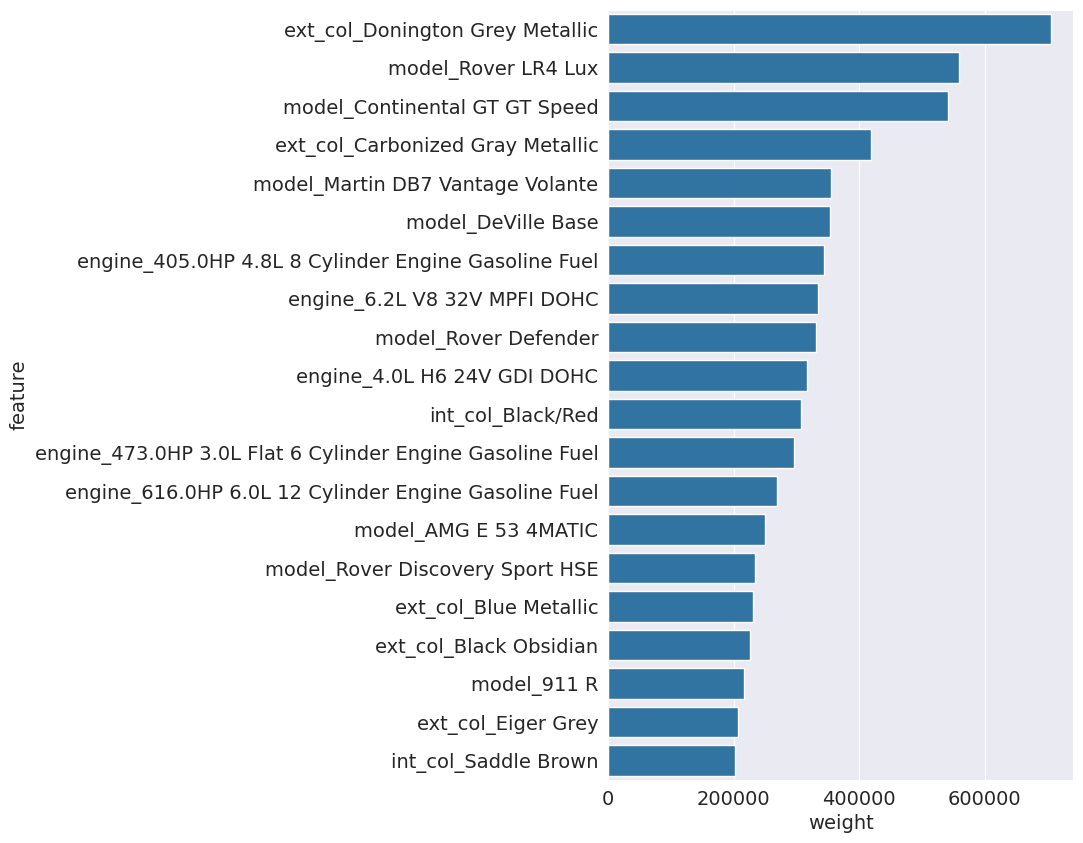

In [90]:
plt.figure(figsize=(6,10))
sns.barplot(data=weight_df.sort_values('weight',ascending = False).head(20), x='weight', y='feature')

In [92]:
train_preds = model.predict(X_train)

In [93]:
train_preds

array([54959.9621876 , 62617.74335705, 56913.29127834, ...,
       37175.32851688, 45738.09769977, 20507.17101607])

## __Let Evaluate Model Performance__

In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(train_targets, train_preds)
mae = mean_absolute_error(train_targets, train_preds)
r2 = r2_score(train_targets, train_preds)

print("Train MSE:", mse)
print("Train MAE:", mae)
print("Train R² Score:", r2)


Train MSE: 4555537637.054397
Train MAE: 19969.400982909807
Train R² Score: 0.2349455036313144


## __We Predict on Validation__

In [98]:
val_preds = model.predict(X_val)

# Evaluate on validation set
val_mse = mean_squared_error(val_targets, val_preds)
val_r2 = r2_score(val_targets, val_preds)

print("Validation MSE:", val_mse)
print("Validation R² Score:", val_r2)

Validation MSE: 8182601103.366689
Validation R² Score: 0.022750806747723895


# __Observations on Train and Validation.__

![screenshot](https://github.com/IruraMwongera/irurajackblogs/blob/main/Screenshot%202025-07-20%20150244.png?raw=true)

## __1. Low R² Score (both train & val)__
- ## R² = 0.235 (train), 0.023 (val) → very low

- ## Meaning: Our linear regression model explains only 23.5% of the variance in the training data and barely 2.3% in the validation data.

- ## Implication: The model is underfitting (Reason being I used very little dataset, I cut my data to protect my processor).

## __2. Validation error is almost 2× the training error__
- ## Train MSE = 4.56B, Val MSE = 8.18B

- ## R² dropped from 0.23 → 0.02 in validation

- ##  Implication: Some mild overfitting, but mostly suggests our model generalizes poorly — likely because of:

- ## Nonlinear relationships (linear model is too simplistic)

- ## Target variable is noisy or hard to predict.
- ## Little amount of dataset used in training.

## __3. MAE is very high__
- ## MAE = ~19,969 — Huge error — model is far off on average.

# __What I will be doing to improve my model__

## 1. I will Switch to a nonlinear model and use  tree-based regressors.

## __Let predict the Test sets__

In [99]:
test_preds = model.predict(X_test)

In [100]:
test_preds

array([21144.5234442 , 72890.29175792, 30878.8387013 , ...,
       26109.82083576, 16194.09040396, 35001.63977255])

## __We get final_submissions_df__

In [102]:
final_submissions_df = pd.DataFrame({
    "id":test_df['id'],
    "Price": test_preds
})

In [103]:
final_submissions_df

id         Price
0       188533  21144.523444
1       188534  72890.291758
4       188537  30878.838701
5       188538  23580.933762
6       188539  -2171.518351
...        ...           ...
125683  314216   2431.901724
125685  314218  31808.213861
125687  314220  26109.820836
125688  314221  16194.090404
125689  314222  35001.639773

[108459 rows x 2 columns]